In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
enc = OrdinalEncoder()
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, SVC


import warnings 
warnings.filterwarnings('ignore')

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

In [7]:
df = pd.read_csv(r"D:\Datasets\avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


region, type and Date are Object type data which needs to change to Int

In [9]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no Null Values present in the database hence we can move a head

In [10]:
df = df.drop(['Unnamed: 0', 'Date'],axis=1)

'Unnamed: 0' and 'Date' contains no information those are only indexes hence have removed

In [11]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Data looks fine to encode into Int

In [12]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Endcoded data into Int

In [13]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,0.499918,2016.147899,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014,0.939938,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,2015.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,0.000000,2015.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,0.000000,2016.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,1.000000,2017.000000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,1.000000,2018.000000,53.000000


In [14]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

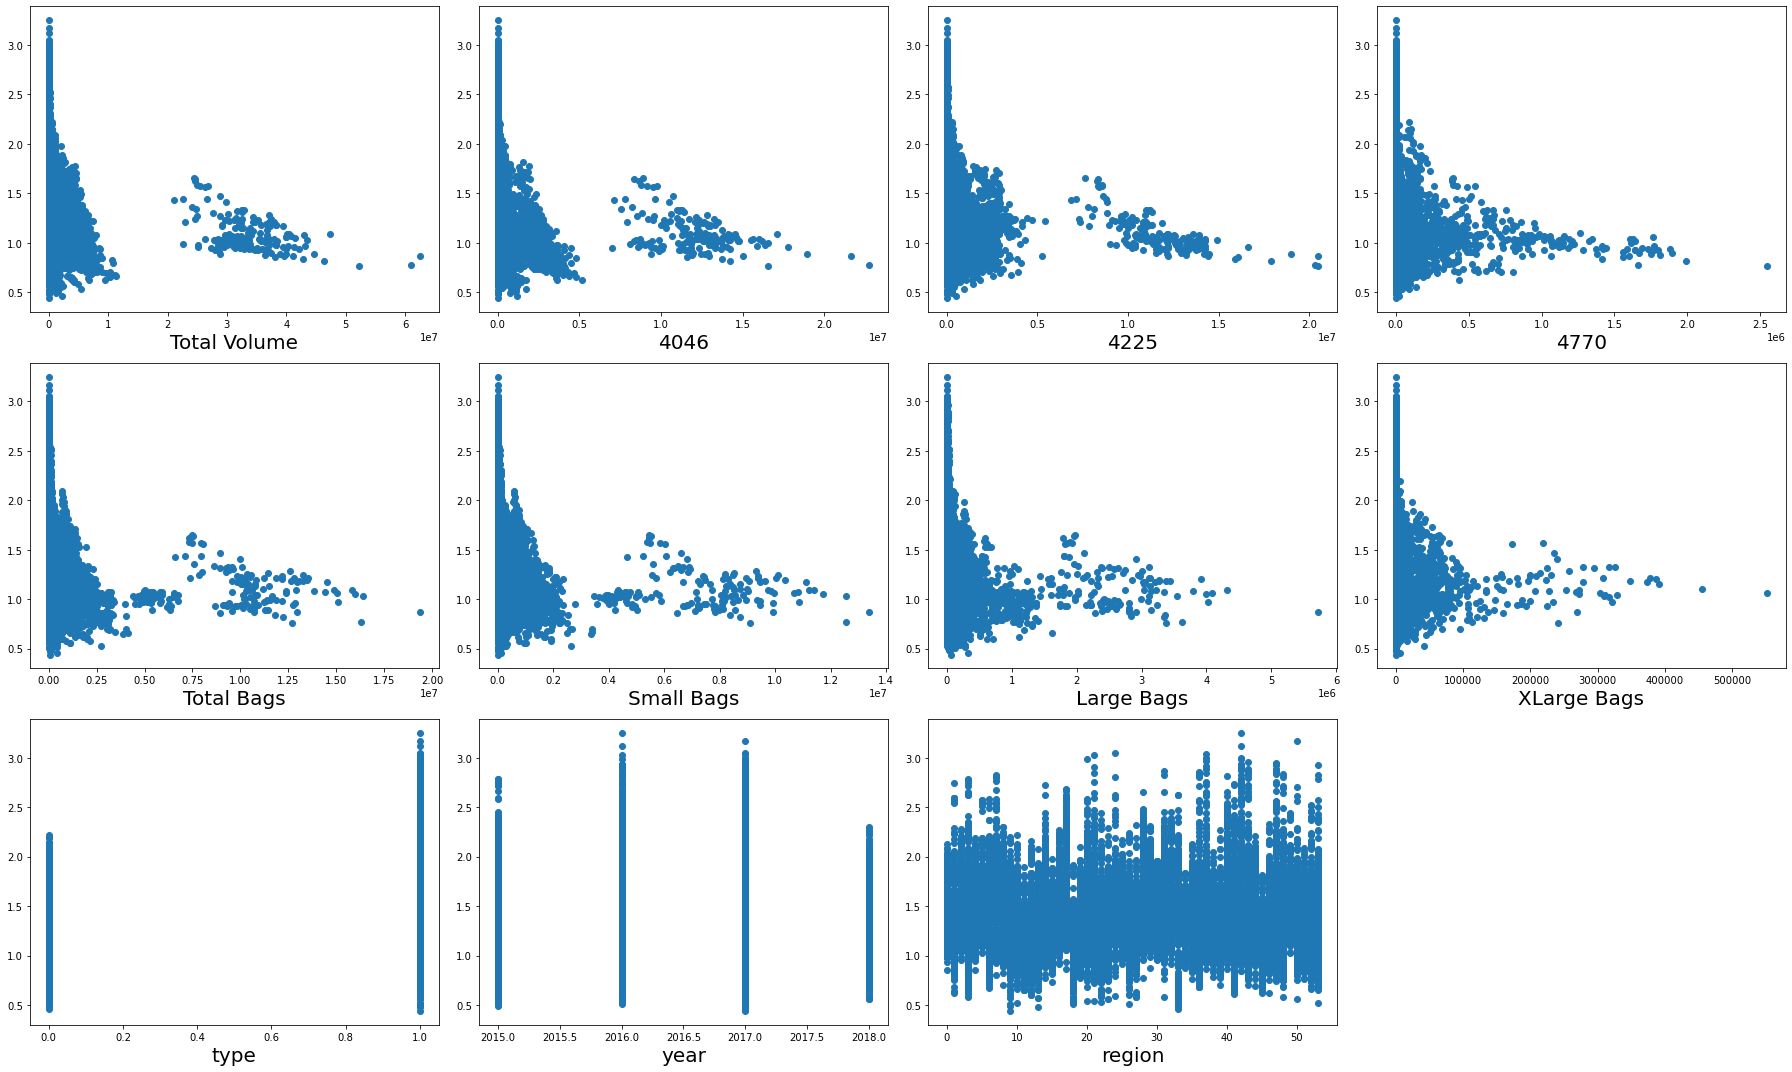

In [15]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Region and year has less or no relationship with AveragePrice 

In [16]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
type             0.000329
year             0.215339
region           0.000030
dtype: float64

Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags has skewness

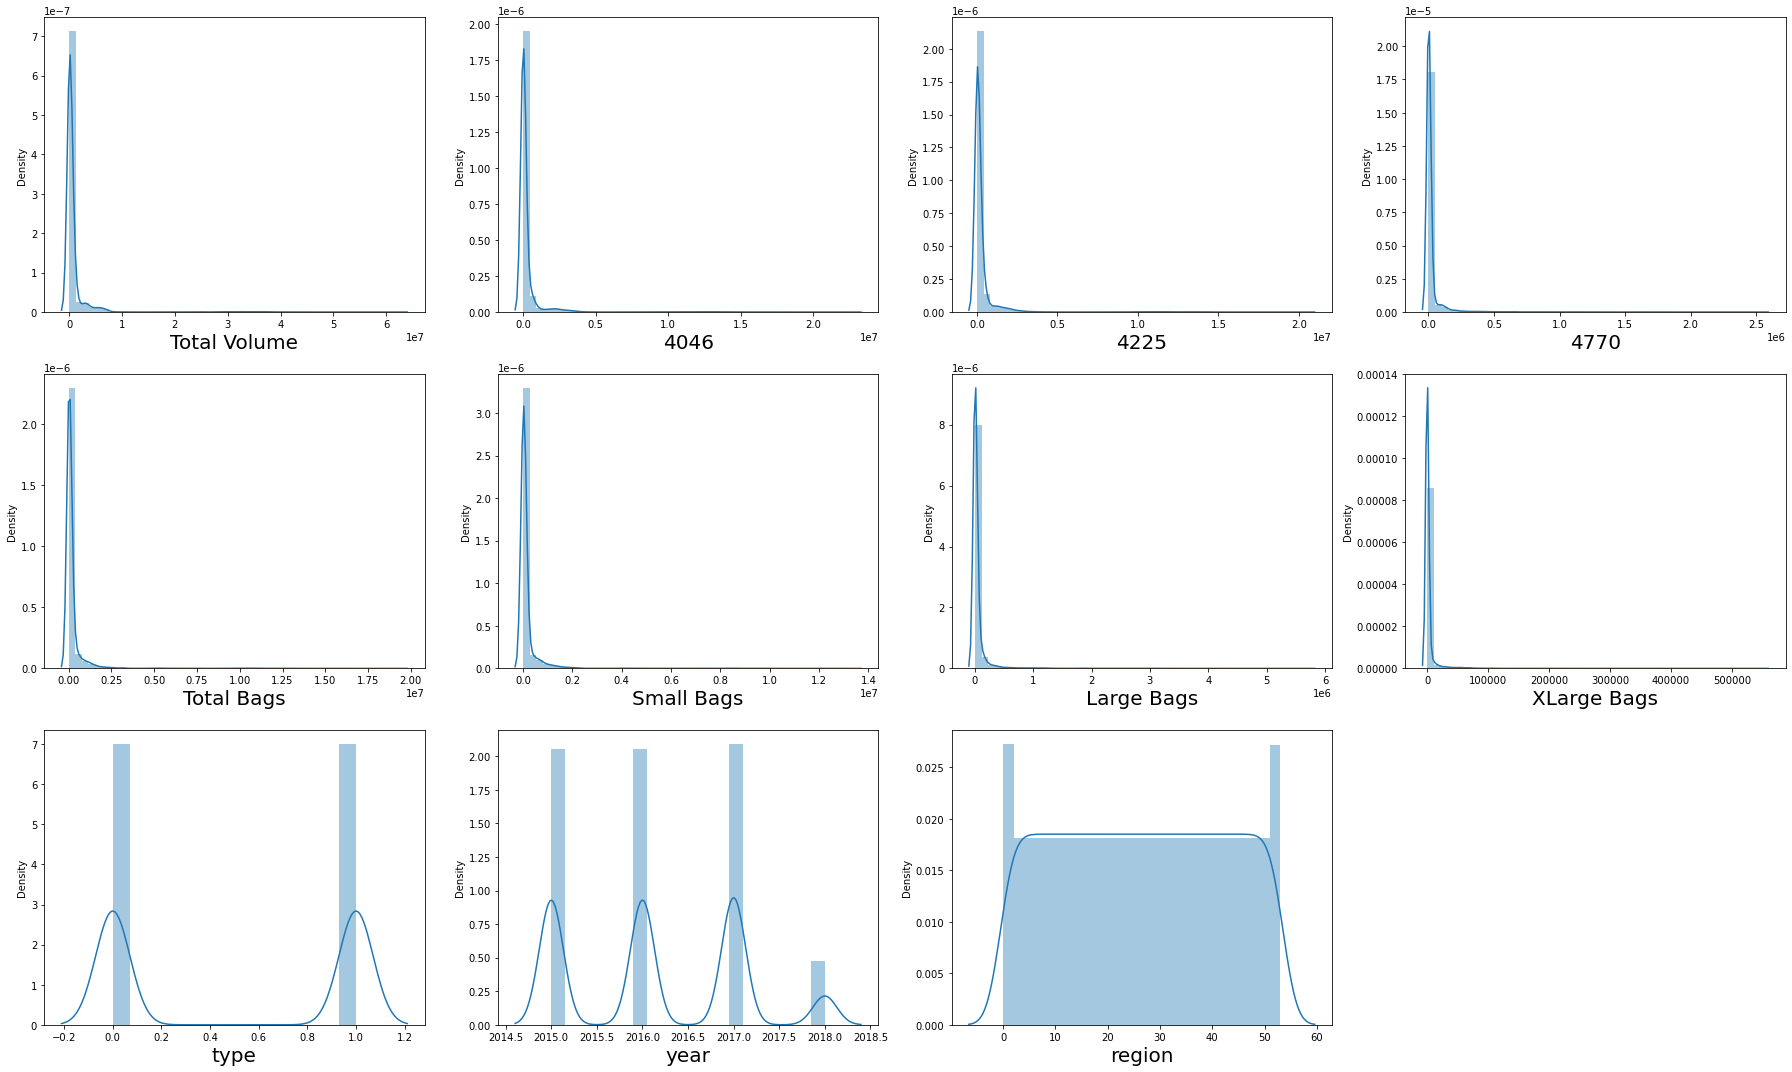

In [17]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags has skewness and can have outliers 

In [18]:
df.drop('AveragePrice',axis=1).corrwith(df.AveragePrice)

Total Volume   -0.192752
4046           -0.208317
4225           -0.172928
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
XLarge Bags    -0.117592
type            0.615845
year            0.093197
region         -0.011716
dtype: float64

region and year have less corelation with label

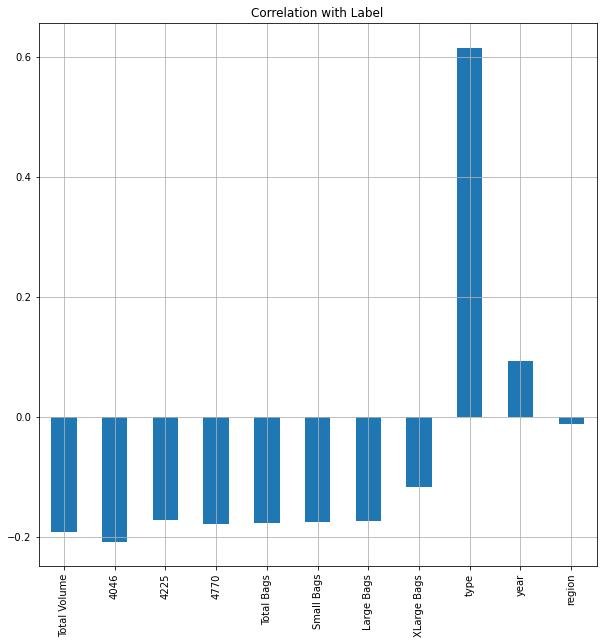

In [19]:
df.drop('AveragePrice',axis=1).corrwith(df.AveragePrice).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

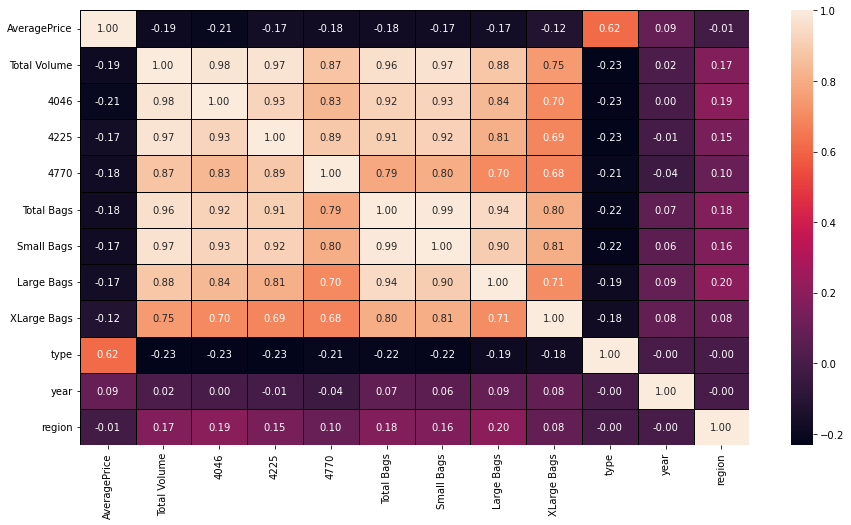

In [20]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

In [21]:
df = df.drop(['year', 'region'],axis=1)

Deleting 'year' and 'region' since it has very low corelation with label

Multicollinearity problem exist in this database

- Multicollinearity problem exist between Total Volume and 4046, 4225, Total Bags, Small Bags
- Multicollinearity problem exist between Total bags and Small Bags


In [22]:
x = df.drop(['Total Volume','AveragePrice','4770','Large Bags', 'XLarge Bags', 'type'],axis=1)
y = df['Total Volume']

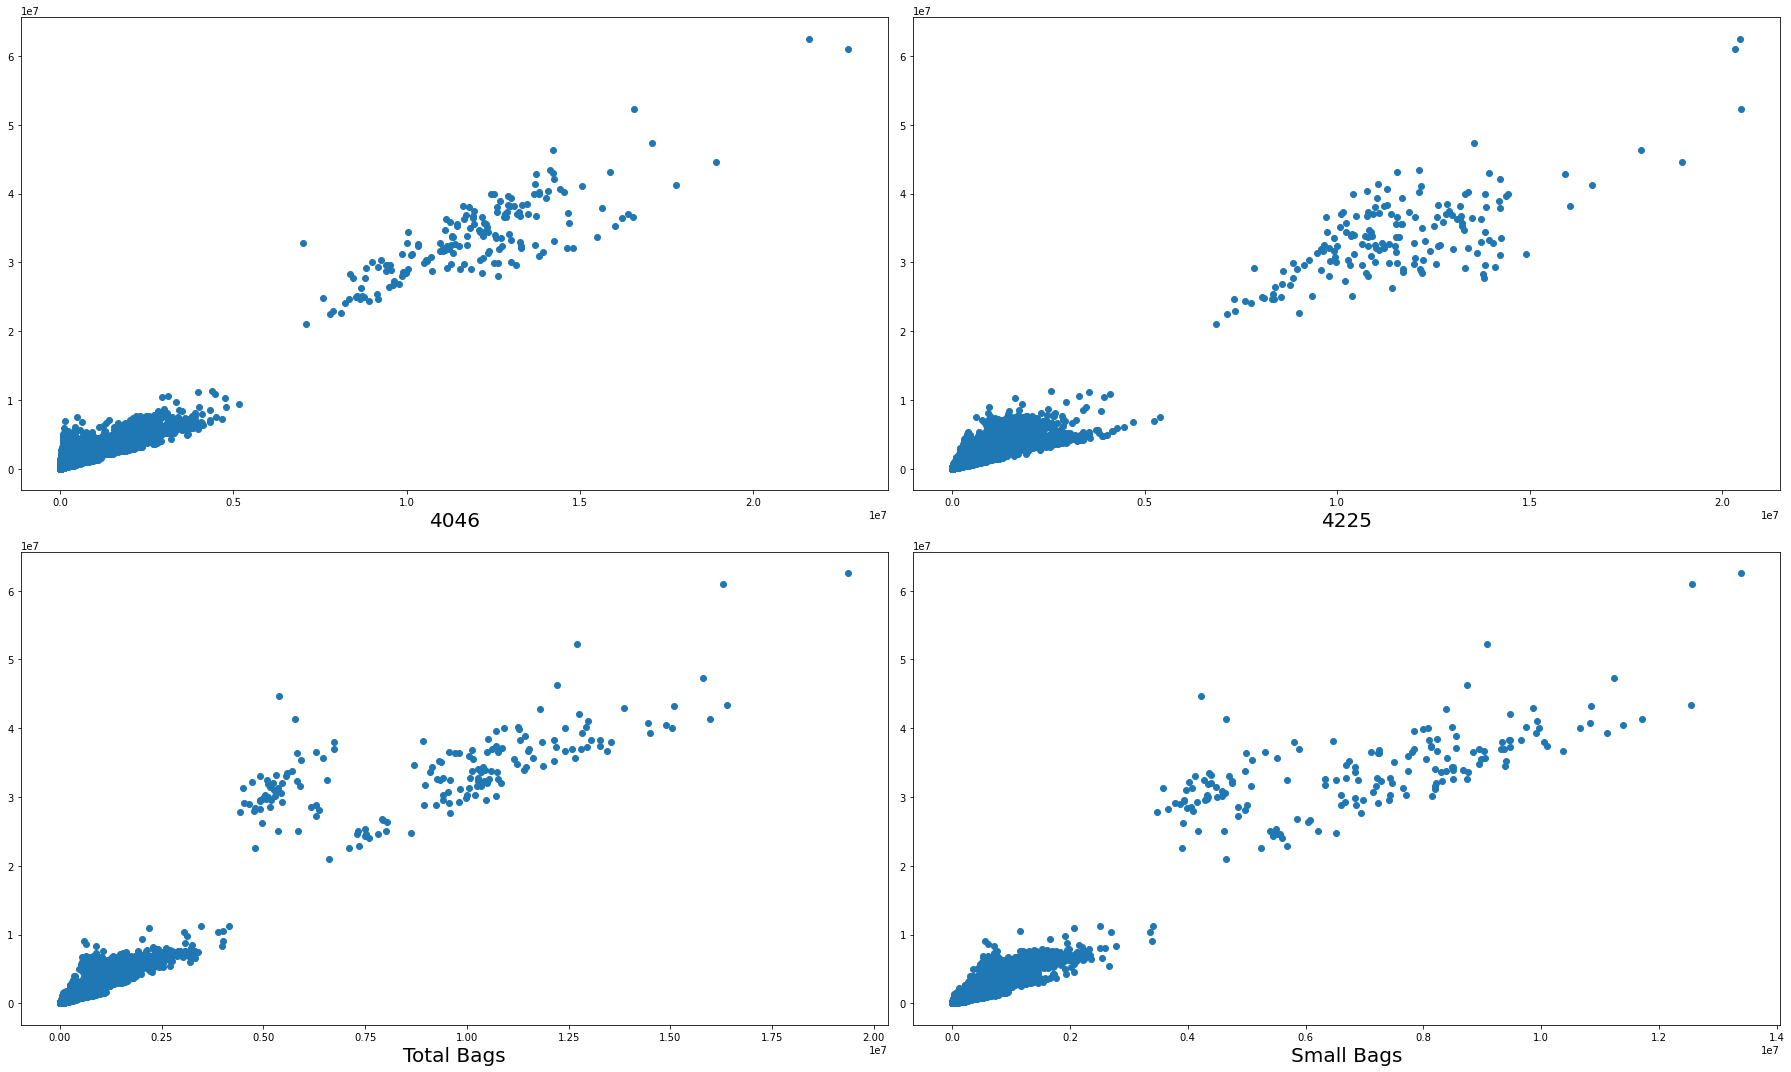

In [23]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 4:
        ax = plt.subplot(2,2,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

- Every added column have Multicollinearity with Total Volume

In [24]:
x = df['Total Bags']
y = df['Small Bags']

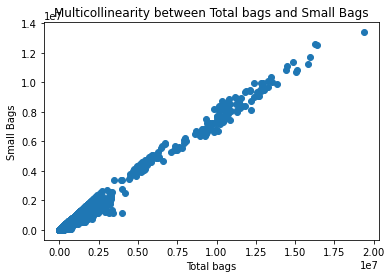

In [25]:
plt.scatter(x,y)
plt.xlabel('Total bags')
plt.ylabel('Small Bags')
plt.title('Multicollinearity between Total bags and Small Bags')
plt.show()

- The Multicollinearity problem exist between Total bags and Small Bags

In [26]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type'],
      dtype='object')

In [27]:
x = df[['Small Bags','Total Bags','4046','4225', 'Total Volume']]

In [28]:
vif = pd.DataFrame()
vif["Features"] = x.columns

In [29]:
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

In [30]:
vif

,Features,VIF
0,Small Bags,106.779528
1,Total Bags,511.441406
2,4046,729.543818
3,4225,750.618115
4,Total Volume,5257.684592


- between Small Bags and Total Bags - removing Total Bags since it has high VIF
- between 4046, 4225 and Total Volume - removing Total Volume since it has high VIF

In [31]:
df = df.drop(['Total Bags','Total Volume'],axis=1)

- Removed Total Volume and Small Bags columns since they have Multicollinearity problem

In [32]:
df.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,0.0,0.0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,0.0,0.0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,0.0,0.0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,0.0,0.0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,0.0,0.0


In [33]:
df.describe()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,2.930084e+05,2.951546e+05,2.283974e+04,1.821947e+05,5.433809e+04,3106.426507,0.499918
std,0.402677,1.264989e+06,1.204120e+06,1.074641e+05,7.461785e+05,2.439660e+05,17692.894652,0.500014
min,0.440000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.100000,8.540700e+02,3.008780e+03,0.000000e+00,2.849420e+03,1.274700e+02,0.000000,0.000000
50%,1.370000,8.645300e+03,2.906102e+04,1.849900e+02,2.636282e+04,2.647710e+03,0.000000,0.000000
75%,1.660000,1.110202e+05,1.502069e+05,6.243420e+03,8.333767e+04,2.202925e+04,132.500000,1.000000
max,3.250000,2.274362e+07,2.047057e+07,2.546439e+06,1.338459e+07,5.719097e+06,551693.650000,1.000000


Database is ready to remove outliers if exist 

In [34]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

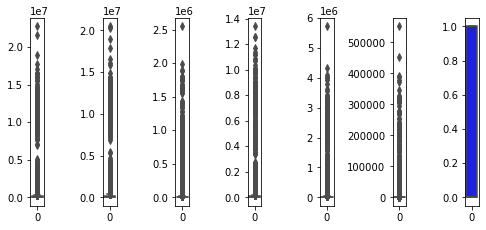

In [35]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Outliers are present in 4046, 4225, 4770, Total Bags, Large Bags, XLarge Bags

In [36]:
old_data = (df.shape)[0]

In [37]:
q1 = df['4046'].quantile(0.25)
q3 = df['4046'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['4046'] > (q3+1.5*iqr))
lower = np.where(df['4046'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from 4046 column

In [38]:
q1 = df['4225'].quantile(0.25)
q3 = df['4225'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['4225'] > (q3+1.5*iqr))
lower = np.where(df['4225'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from 4225 column

In [39]:
q1 = df['4770'].quantile(0.25)
q3 = df['4770'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['4770'] > (q3+1.5*iqr))
lower = np.where(df['4770'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from 4770 column

In [40]:
q1 = df['Small Bags'].quantile(0.25)
q3 = df['Small Bags'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['Small Bags'] > (q3+1.5*iqr))
lower = np.where(df['Small Bags'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from Total Bags column

In [41]:
q1 = df['Large Bags'].quantile(0.25)
q3 = df['Large Bags'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['Large Bags'] > (q3+1.5*iqr))
lower = np.where(df['Large Bags'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from Large Bags column

In [42]:
q1 = df['XLarge Bags'].quantile(0.25)
q3 = df['XLarge Bags'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['XLarge Bags'] > (q3+1.5*iqr))
lower = np.where(df['XLarge Bags'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from XLarge Bags column

In [43]:
new_data = (df.shape)[0]

In [44]:
data_loss = old_data - new_data
print('Lost', data_loss,'no. of Data')

Lost 10334 no. of Data


In [45]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

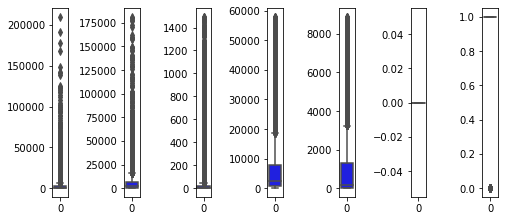

In [46]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Removed Outliers that are not allowed above and below the specified limit

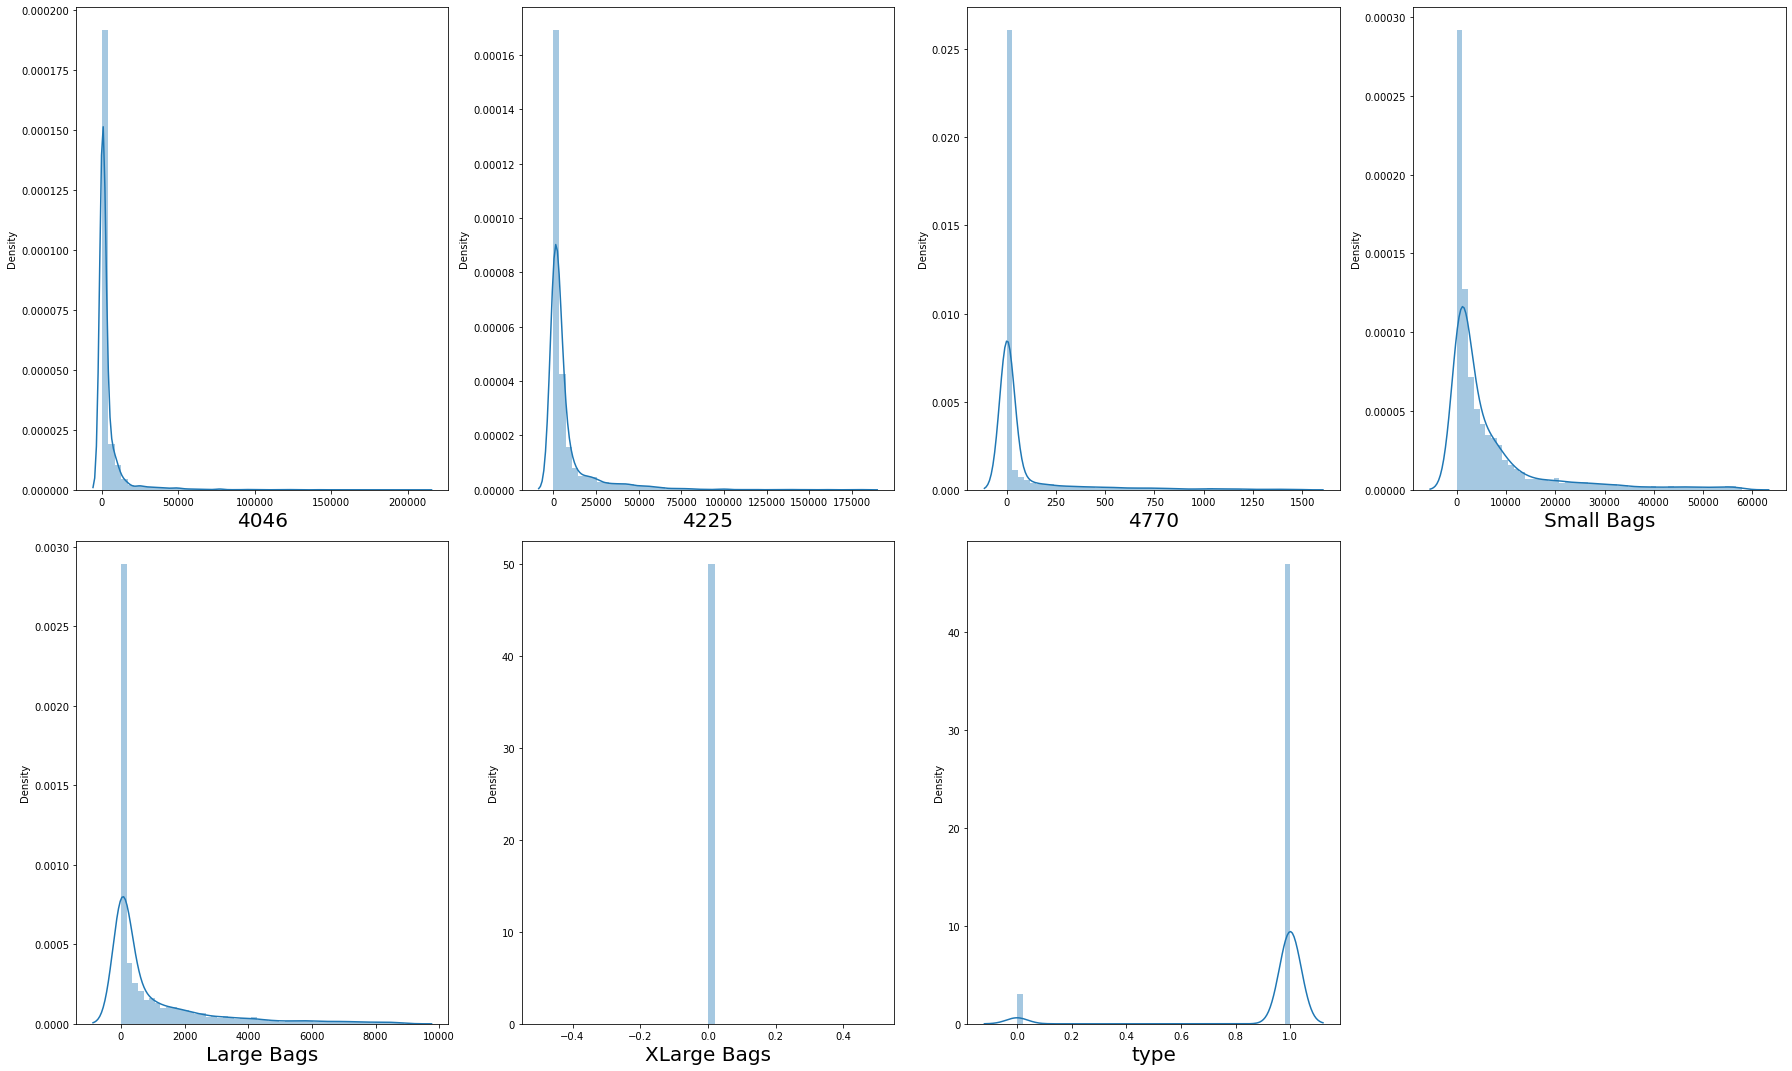

In [47]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

There is a skewness present in the data hence using PowerTransformer to remove it

In [48]:
scaler = PowerTransformer(method='yeo-johnson')

In [49]:
df[['4046','4225','4770','Small Bags','Large Bags']] = scaler.fit_transform(df[['4046','4225','4770','Small Bags','Large Bags']].values)

In [50]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

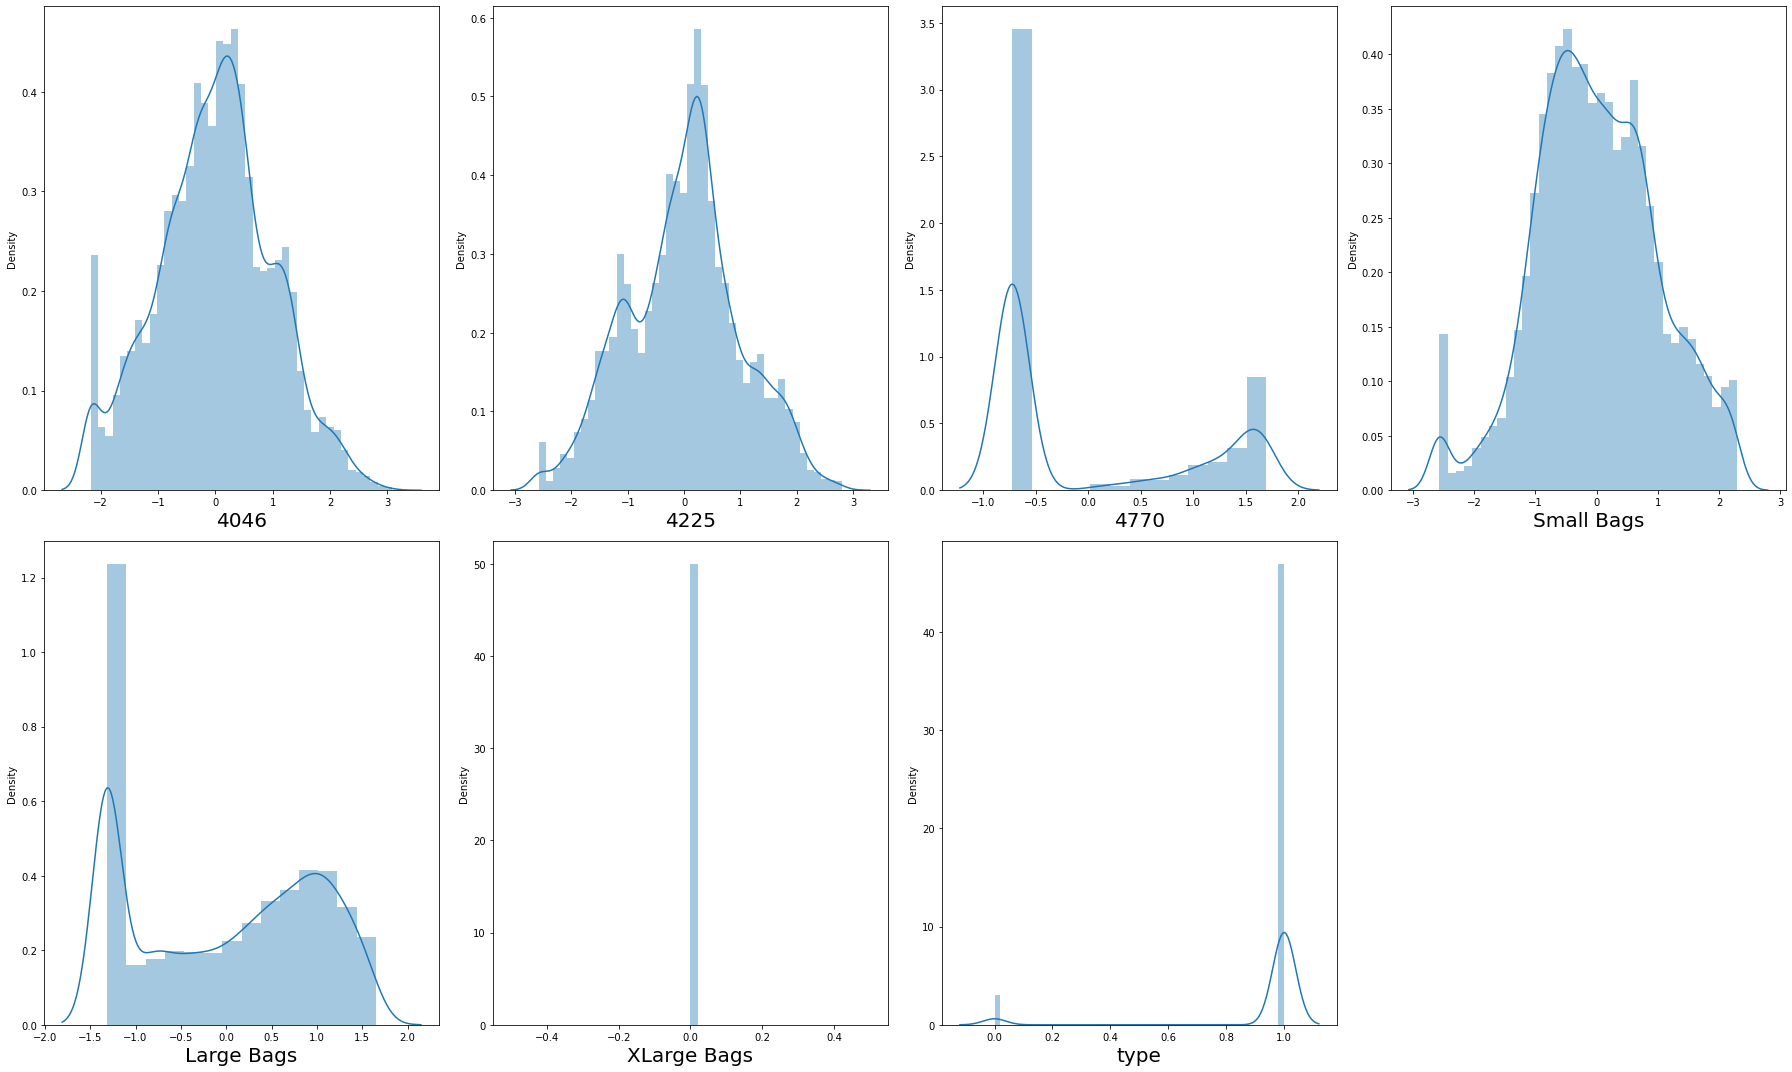

In [51]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed skewness from the data

In [52]:
df = df.drop('XLarge Bags',axis=1)
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

Droping XLarge Bags since it has only one value 

In [53]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaling the data

# LinearRegression

In [54]:
reg = LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    reg.fit(x_train, y_train)
    x_pred = reg.predict(x_train)
    y_pred = reg.predict(x_test)
    print("At Random state", (i), "the training accuracy is :-", (r2_score (y_train,x_pred)))
    print("At Random state", (i), "the testing accuracy is :-", (r2_score (y_test,y_pred)))
    print('\n')

At Random state 0 the training accuracy is :- 0.22655639570813724
At Random state 0 the testing accuracy is :- 0.20815353137635095


At Random state 1 the training accuracy is :- 0.22641174328407865
At Random state 1 the testing accuracy is :- 0.2100434799816644


At Random state 2 the training accuracy is :- 0.23020594501614888
At Random state 2 the testing accuracy is :- 0.19753744674756668


At Random state 3 the training accuracy is :- 0.21886091774532335
At Random state 3 the testing accuracy is :- 0.23008540647955156


At Random state 4 the training accuracy is :- 0.21386579623895663
At Random state 4 the testing accuracy is :- 0.2458044752688553


At Random state 5 the training accuracy is :- 0.2203039444515279
At Random state 5 the testing accuracy is :- 0.22764197876135384


At Random state 6 the training accuracy is :- 0.22695628429409465
At Random state 6 the testing accuracy is :- 0.20561634175647958


At Random state 7 the training accuracy is :- 0.22421875740611585
At Ran

At Random state 71 the training accuracy is :- 0.21999070052803082
At Random state 71 the testing accuracy is :- 0.2275509640757044


At Random state 72 the training accuracy is :- 0.2290938495111502
At Random state 72 the testing accuracy is :- 0.20063803738774377


At Random state 73 the training accuracy is :- 0.21692844151798818
At Random state 73 the testing accuracy is :- 0.2362715415511455


At Random state 74 the training accuracy is :- 0.22343631699278665
At Random state 74 the testing accuracy is :- 0.21698243020299013


At Random state 75 the training accuracy is :- 0.2227574546341594
At Random state 75 the testing accuracy is :- 0.21962583226617938


At Random state 76 the training accuracy is :- 0.22036184226254008
At Random state 76 the testing accuracy is :- 0.22706239479184587


At Random state 77 the training accuracy is :- 0.22831297234094972
At Random state 77 the testing accuracy is :- 0.20269957715961429


At Random state 78 the training accuracy is :- 0.2310663836

In [55]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 65)

In [56]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {r2_score (y_train,y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {r2_score (y_test,pred)*100:.2f}%') 
        
        print ('\n mean_absolute_error',mean_absolute_error(y_test,pred))
        print ('\n mean_squared_error',mean_squared_error (y_test,pred))
         

In [57]:
reg = LinearRegression()
reg.fit(x_train,y_train)

print_score(reg,x_train,x_test,y_train,y_test, train=True)
print_score(reg,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 21.60%

===============Test Result===============
Accuracy Score: 23.97%

 mean_absolute_error 0.2373759030890017

 mean_squared_error 0.09563557209919207


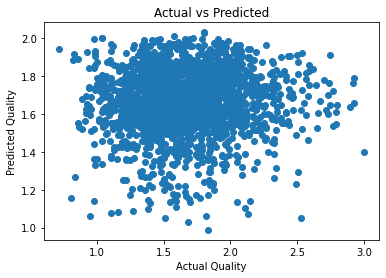

In [58]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Actual vs Predicted')
plt.show()

In [59]:
Lassocv = LassoCV(alphas = np.arange(0.001,0.1,0.01), max_iter = 100, normalize = True)
Lassocv.fit(x_train, y_train)
alpha = Lassocv.alpha_
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)
prediction = lasso_reg.predict(x_test)
r2_score(y_test, prediction)

0.2394191518695168

In [60]:
rdgcv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)
rdgcv.fit(x_train, y_train)
alpha = rdgcv.alpha_
rd_model = Ridge(alpha)
rd_model.fit(x_train, y_train)
prediction = rd_model.predict(x_test)
r2_score(y_test, prediction)

0.23969248371157814

# DecisionTreeRegressor

In [61]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

print_score(dtr,x_train,x_test,y_train,y_test, train=True)
print_score(dtr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 17.56%

 mean_absolute_error 0.21769075290550782

 mean_squared_error 0.10369494694290043


# AdaBoostRegressor

In [62]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

print_score(ada,x_train,x_test,y_train,y_test, train=True)
print_score(ada,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 20.11%

===============Test Result===============
Accuracy Score: 19.77%

 mean_absolute_error 0.25414151801084633

 mean_squared_error 0.10091206183169724


# GradientBoostingRegressor

In [63]:
gbdt = GradientBoostingRegressor()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 47.53%

===============Test Result===============
Accuracy Score: 42.34%

 mean_absolute_error 0.20494078557746628

 mean_squared_error 0.0725305739403567


# RandomForestRegressor

In [64]:
rfr = GradientBoostingRegressor()
rfr.fit(x_train,y_train)

print_score(rfr,x_train,x_test,y_train,y_test, train=True)
print_score(rfr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 47.53%

===============Test Result===============
Accuracy Score: 42.34%

 mean_absolute_error 0.20494045858590584

 mean_squared_error 0.07253039415857147


# Support vector 

In [65]:
svr = SVR()
svr.fit(x_train,y_train)

print_score(svr,x_train,x_test,y_train,y_test, train=True)
print_score(svr,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 44.77%

===============Test Result===============
Accuracy Score: 43.88%

 mean_absolute_error 0.19237119162910735

 mean_squared_error 0.07059017085467549


# Findings

- LinearRegression train accuracy score 21.60% and test accuracy score 23.97%
- DecisionTreeRegressor train accuracy score 100% and test accuracy score 18.24%
- AdaBoostRegressor train accuracy score 12.47% and test accuracy score 10.91%
- GradientBoostingRegressor train accuracy score 47.53% and test accuracy score 42.34%
- RandomForestRegressor train accuracy score 47.53% and test accuracy score 42.34%
- Support Vector Regression train accuracy score 44.77% and test accuracy score 43.88%

# Conclusion 

##### Selecting Support Vector Regression since the Accuracy score and test scores are greater and clsoe to each other.

### Saving the Model 

In [62]:
file = 'Avacado_Project.pickle'
pickle.dump(svr, open(file, 'wb'))

### Creating Classification Model

In [63]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [64]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

There is no Class imbalance

In [65]:
df = df.drop(['Unnamed: 0', 'Date'],axis=1)

No information available for 'Unnamed: 0', 'Date' hence have removed those columns

In [66]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

Encoded date from Str values to Int

In [67]:
x = df.drop(['region'],axis=1)
y = df['region']

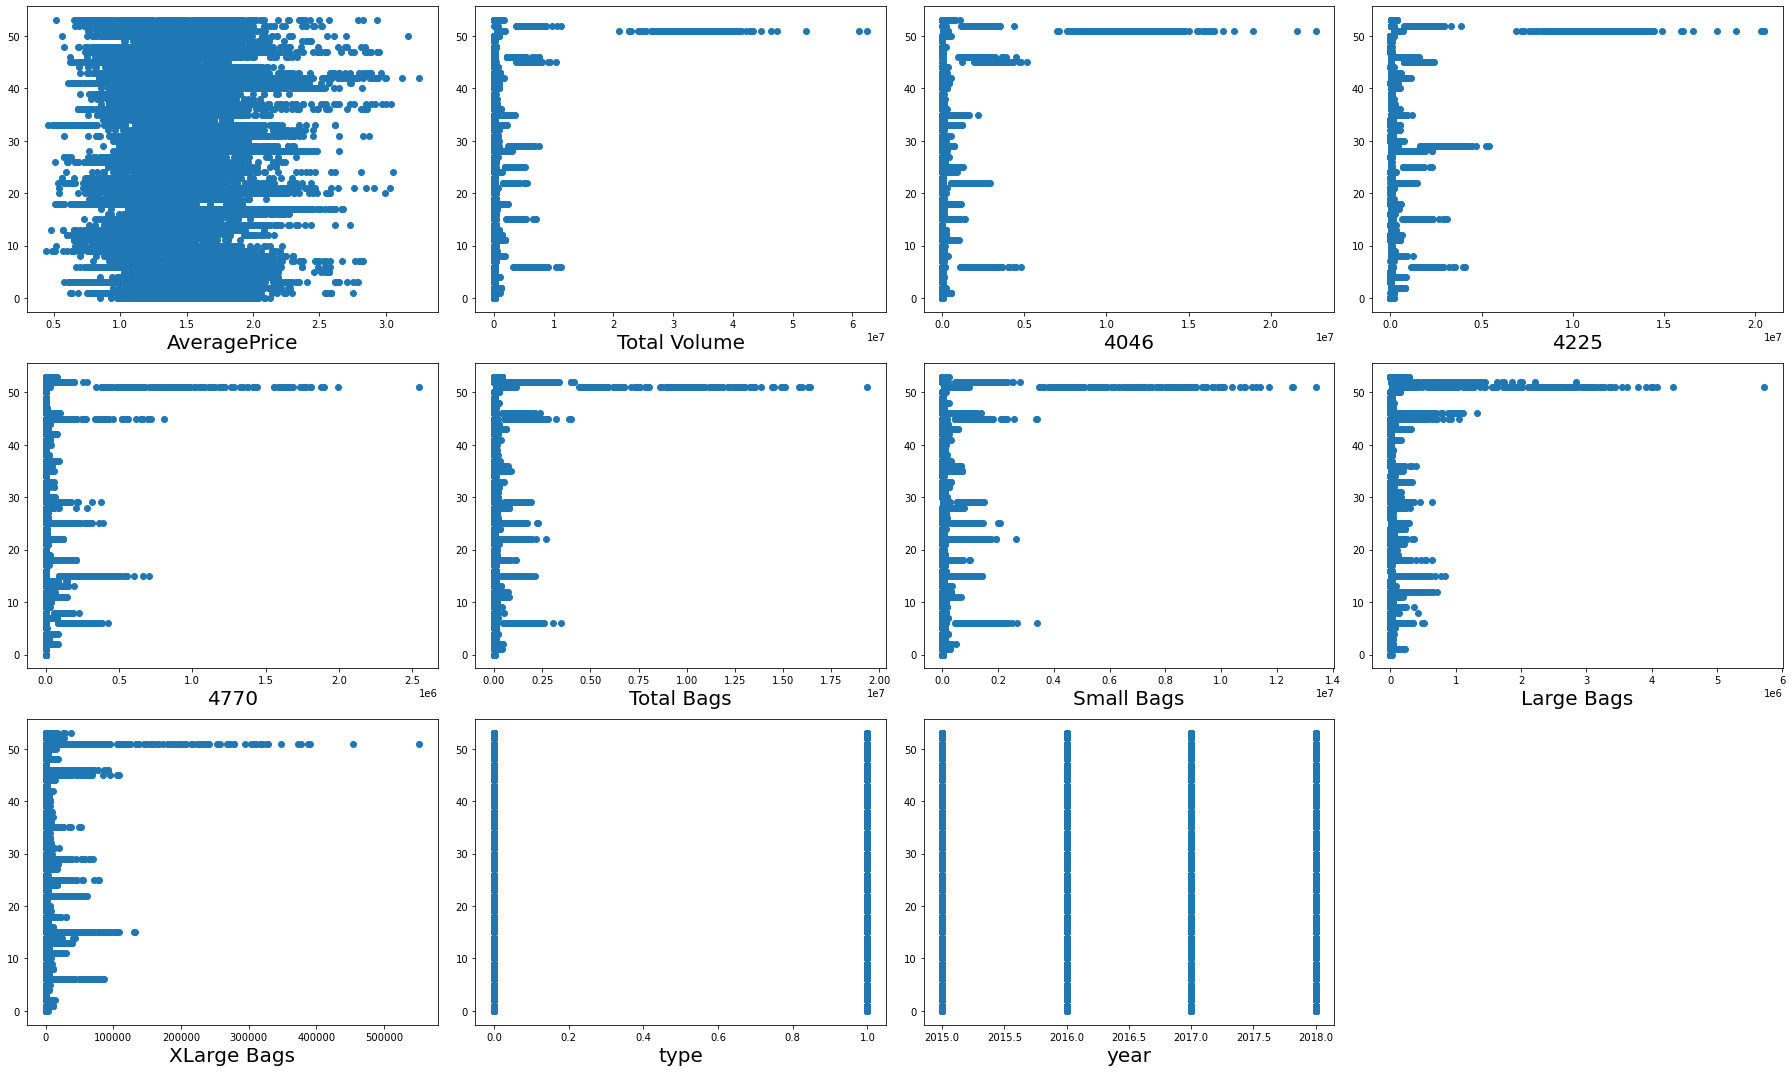

In [68]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 12:
        ax = plt.subplot(3,4,plotno)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

No relationship between Type and year columns

In [69]:
df.drop('region',axis=1).corrwith(df.region)

AveragePrice   -0.011716
Total Volume    0.174176
4046            0.192073
4225            0.145726
4770            0.095252
Total Bags      0.175256
Small Bags      0.164702
Large Bags      0.198768
XLarge Bags     0.082281
type           -0.000280
year           -0.000055
dtype: float64

type and year has no co-relation with label

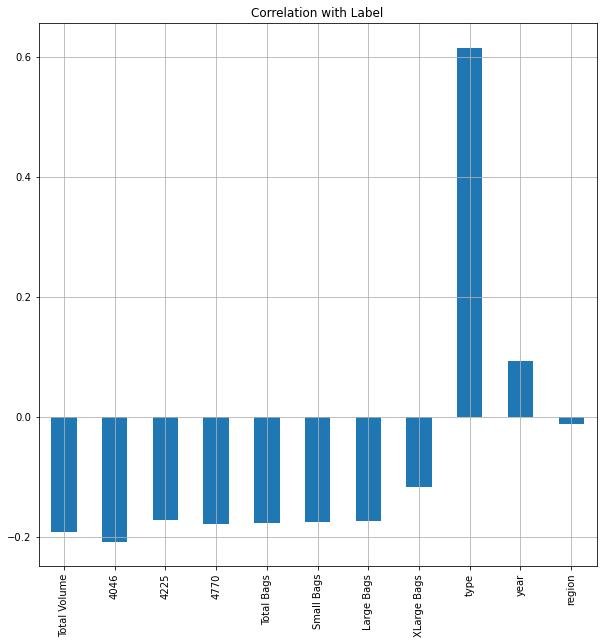

In [70]:
df.drop('AveragePrice',axis=1).corrwith(df.AveragePrice).plot(kind='bar',grid=True,figsize=(10,10),
                                                     title="Correlation with Label")
plt.show()

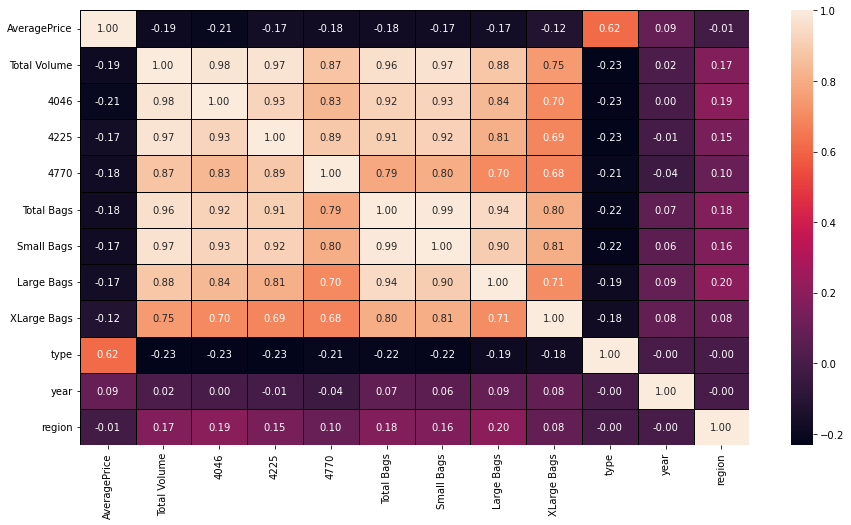

In [71]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(),annot=True, linewidths=0.5,linecolor='black',fmt = '.2f')
plt.show()

In [72]:
df = df.drop(['Total Bags','Total Volume'],axis=1)

In [73]:
df = df.drop(['type','year'],axis=1)

Have already deal with multiple correlation issue in regression problem hence have directly dropped 'Total Bags','Total Volume', 'type' and 'year' columns

In [74]:
x = df.drop(['region'],axis=1)
y = df['region']

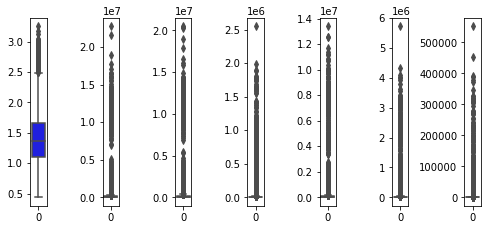

In [75]:
a = x.columns.values
col = 30
row = 14
plt.figure(figsize = (col,3*row))
for i in range(0, len(a)):
    plt.subplot(row,col,i+1)
    sns.boxplot(data = x[a[i]],color='blue',orient='v')
    plt.tight_layout()

Outliers are present in all the columns

In [76]:
old_data = (df.shape)[0]

In [77]:
q1 = df['AveragePrice'].quantile(0.25)
q3 = df['AveragePrice'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['AveragePrice'] > (q3+1.5*iqr))
lower = np.where(df['AveragePrice'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

In [78]:
q1 = df['4046'].quantile(0.25)
q3 = df['4046'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['4046'] > (q3+1.5*iqr))
lower = np.where(df['4046'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

In [79]:
q1 = df['4225'].quantile(0.25)
q3 = df['4225'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['4225'] > (q3+1.5*iqr))
lower = np.where(df['4225'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

In [80]:
q1 = df['4770'].quantile(0.25)
q3 = df['4770'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['4770'] > (q3+1.5*iqr))
lower = np.where(df['4770'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

In [81]:
q1 = df['Small Bags'].quantile(0.25)
q3 = df['Small Bags'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['Small Bags'] > (q3+1.5*iqr))
lower = np.where(df['Small Bags'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

In [82]:
q1 = df['Large Bags'].quantile(0.25)
q3 = df['Large Bags'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['Large Bags'] > (q3+1.5*iqr))
lower = np.where(df['Large Bags'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

In [83]:
q1 = df['XLarge Bags'].quantile(0.25)
q3 = df['XLarge Bags'].quantile(0.75)
iqr = q3 - q1

upper = np.where(df['XLarge Bags'] > (q3+1.5*iqr))
lower = np.where(df['XLarge Bags'] < (q1-1.5*iqr))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

df = df.reset_index()
df = df.drop('index',axis=1)

Removed Outliers from XLarge Bags, Large Bags, Small Bags, 4770, 4225, 4046 and AveragePrice

In [84]:
new_data = (df.shape)[0]

In [85]:
data_loss = old_data - new_data
print('Lost', data_loss,'no. of Data')

Lost 10371 no. of Data


In [86]:
x = df.drop(['region'],axis=1)
y = df['region']

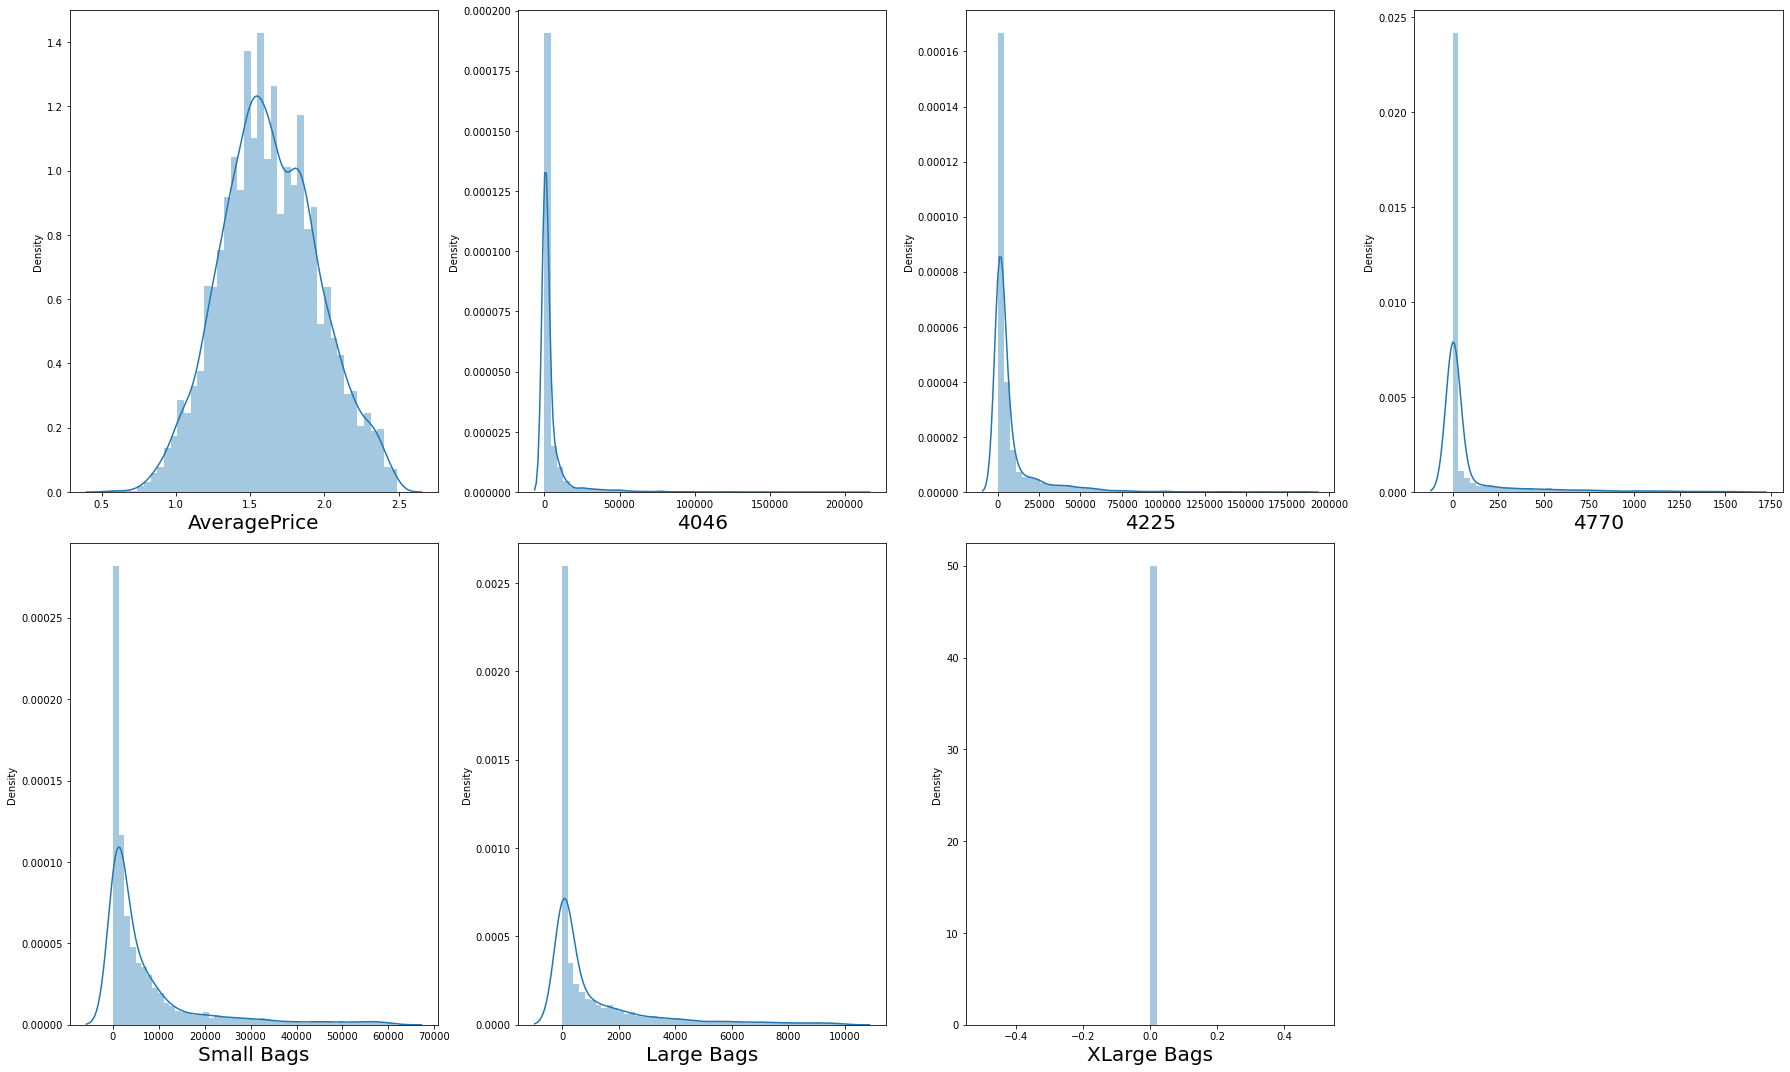

In [87]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Data have skewness hence using PowerTransformer technique to standardized the data

In [88]:
scaler = PowerTransformer(method='yeo-johnson')

In [89]:
df[['4046','4225','4770','Small Bags','Large Bags']] = scaler.fit_transform(df[['4046','4225','4770','Small Bags','Large Bags']].values)

In [90]:
x = df.drop(['region'],axis=1)
y = df['region']

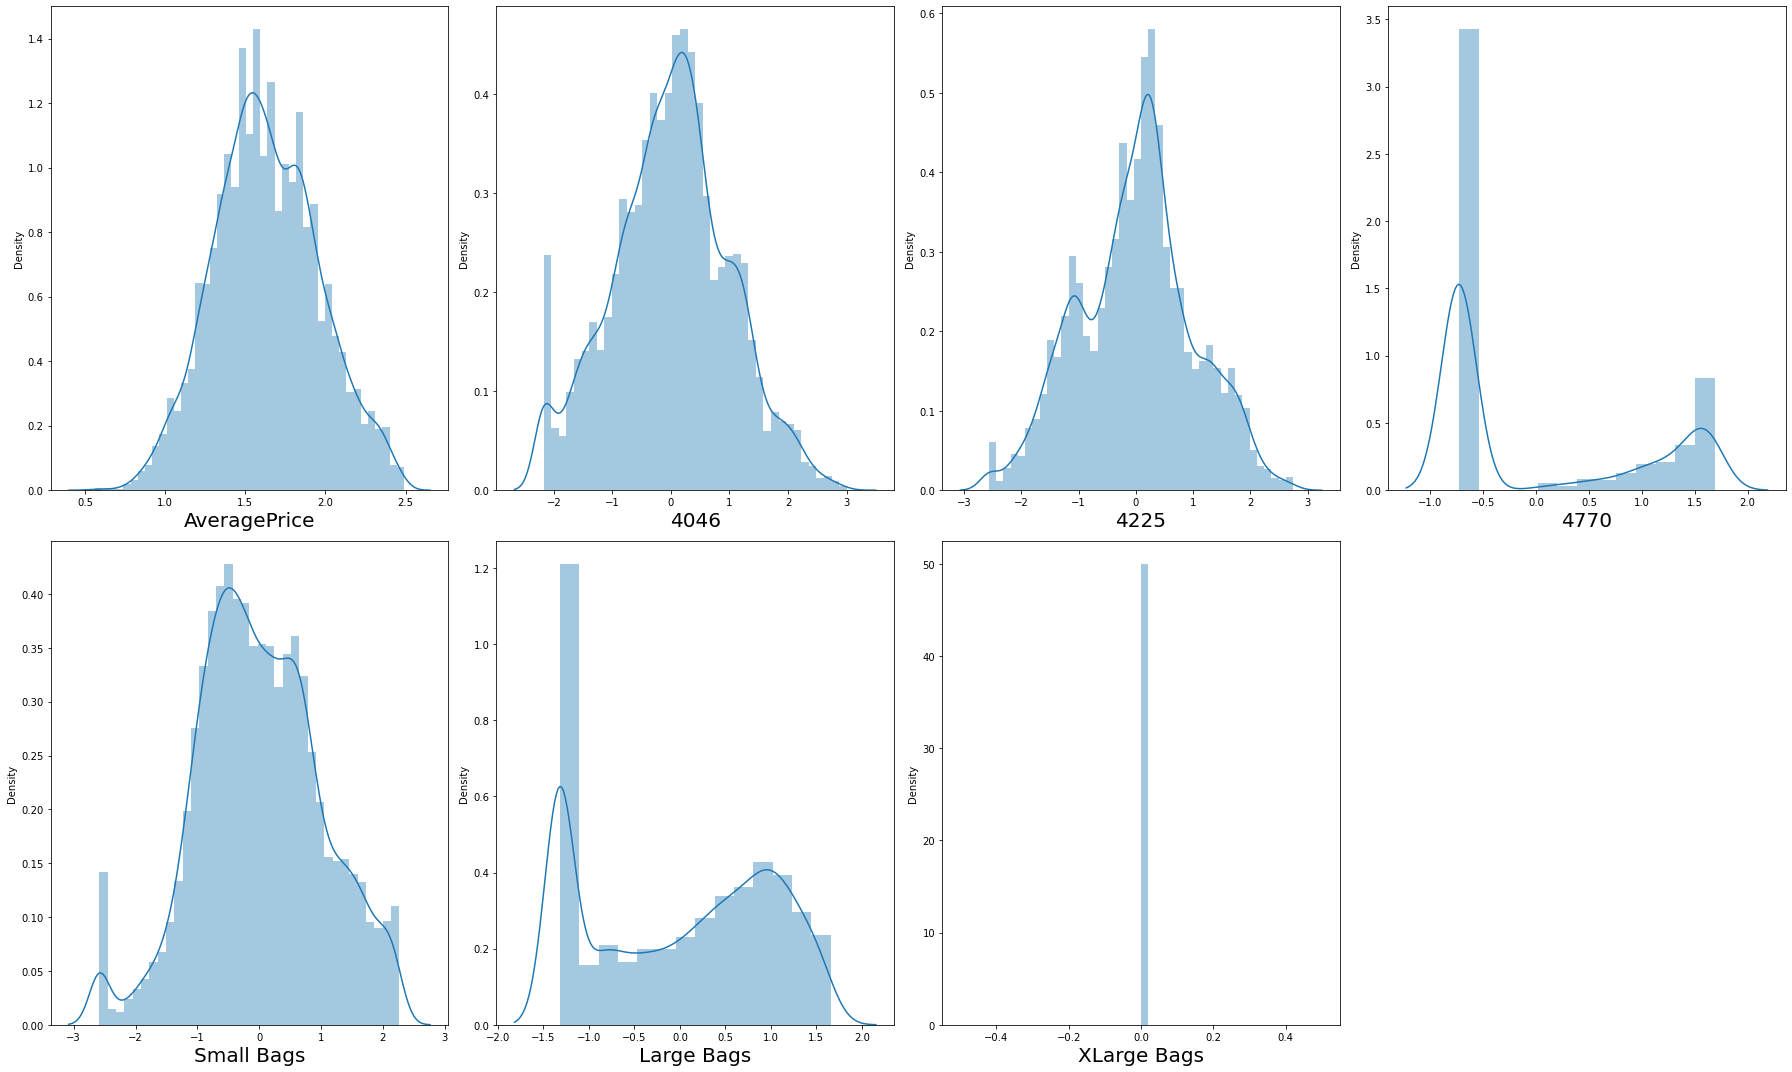

In [91]:
plt.figure(figsize=(25,15), facecolor='white')

plotno = 1

for column in x:
    if plotno <= 8:
        ax = plt.subplot(2,4,plotno)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
        
    plotno+=1
plt.tight_layout()

Removed Skewness 

In [92]:
scaler = StandardScaler()
X_scale = scaler.fit_transform(x)

Scaled the Data

# Model Buidling

# LogisticRegression

In [93]:
maxAccu =0 
maxRS= 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = i)
    log = LogisticRegression()
    log.fit(x_train,y_train)
    y_pred=log.predict(x_test)
    acc=accuracy_score(y_test, y_pred)
    print('accuracy', acc,'Random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy', maxAccu,'max_Random_state',i)

accuracy 0.4964467005076142 Random_state 1
max_accuracy 0.4964467005076142 max_Random_state 1
accuracy 0.48375634517766497 Random_state 2
accuracy 0.4812182741116751 Random_state 3
accuracy 0.49796954314720815 Random_state 4
max_accuracy 0.49796954314720815 max_Random_state 4
accuracy 0.5025380710659898 Random_state 5
max_accuracy 0.5025380710659898 max_Random_state 5
accuracy 0.5035532994923858 Random_state 6
max_accuracy 0.5035532994923858 max_Random_state 6
accuracy 0.4878172588832487 Random_state 7
accuracy 0.5055837563451777 Random_state 8
max_accuracy 0.5055837563451777 max_Random_state 8
accuracy 0.49137055837563454 Random_state 9
accuracy 0.49137055837563454 Random_state 10
accuracy 0.5071065989847716 Random_state 11
max_accuracy 0.5071065989847716 max_Random_state 11
accuracy 0.5091370558375634 Random_state 12
max_accuracy 0.5091370558375634 max_Random_state 12
accuracy 0.4918781725888325 Random_state 13
accuracy 0.49086294416243653 Random_state 14
accuracy 0.4984771573604061 

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X_scale,y,test_size = 0.25,random_state = 126)

In [95]:
def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print('\n===============Train Result===============')
        print(f'Accuracy Score: {accuracy_score(y_train, y_pred)*100:.2f}%')
        
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print('\n===============Test Result===============')
        print(f'Accuracy Score: {accuracy_score(y_test, pred)*100:.2f}%')
        
        print('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2))
        
        scr_log = cross_val_score(clf,X_scale,y,cv=5)
        print('Cross Validation Score- ', scr_log.mean())

In [96]:
log = LogisticRegression()
log.fit(x_train,y_train)

print_score(log,x_train,x_test,y_train,y_test, train=True)
print_score(log,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 51.03%

===============Test Result===============
Accuracy Score: 51.68%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.35      0.44      0.39        63
         1.0       0.35      0.47      0.40        38
         2.0       0.72      0.62      0.67        42
         3.0       0.45      0.38      0.41        37
         4.0       0.76      0.57      0.65        46
         5.0       0.23      0.16      0.19        50
         6.0       0.77      0.87      0.82        23
         7.0       0.64      0.63      0.64        46
         8.0       0.92      0.92      0.92        37
         9.0       0.60      0.78      0.68        37
        10.0       0.33      0.02      0.04        46
        11.0       0.71      0.81      0.76        42
        12.0       0.40      0.30      0.34        20
        13.0       0.28      0.25      0.26        32
        14.0       0.66

# RandomForestClassifier

In [97]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

print_score(rfc,x_train,x_test,y_train,y_test, train=True)
print_score(rfc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 84.16%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.75      0.90      0.82        63
         1.0       0.67      0.76      0.72        38
         2.0       0.98      0.95      0.96        42
         3.0       0.79      0.70      0.74        37
         4.0       0.88      0.91      0.89        46
         5.0       0.73      0.76      0.75        50
         6.0       0.96      0.96      0.96        23
         7.0       0.85      0.85      0.85        46
         8.0       0.97      0.89      0.93        37
         9.0       0.80      0.86      0.83        37
        10.0       0.81      0.65      0.72        46
        11.0       0.95      0.88      0.91        42
        12.0       1.00      0.90      0.95        20
        13.0       0.86      0.78      0.82        32
        14.0       0.8

# DecisionTreeClassifier

In [98]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

print_score(dtc,x_train,x_test,y_train,y_test, train=True)
print_score(dtc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 100.00%

===============Test Result===============
Accuracy Score: 71.73%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.65      0.67      0.66        63
         1.0       0.64      0.55      0.59        38
         2.0       0.95      0.83      0.89        42
         3.0       0.67      0.59      0.63        37
         4.0       0.77      0.72      0.74        46
         5.0       0.53      0.64      0.58        50
         6.0       0.92      0.96      0.94        23
         7.0       0.81      0.76      0.79        46
         8.0       0.88      0.81      0.85        37
         9.0       0.78      0.68      0.72        37
        10.0       0.57      0.52      0.55        46
        11.0       0.73      0.86      0.79        42
        12.0       0.67      0.60      0.63        20
        13.0       0.76      0.59      0.67        32
        14.0       0.7

# GradientBoostingClassifier

In [99]:
gbdt = GradientBoostingClassifier()
gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test, train=True)
print_score(gbdt,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 99.32%

===============Test Result===============
Accuracy Score: 75.69%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.69      0.81      0.74        63
         1.0       0.58      0.55      0.57        38
         2.0       0.90      0.83      0.86        42
         3.0       0.67      0.65      0.66        37
         4.0       0.75      0.87      0.81        46
         5.0       0.55      0.56      0.55        50
         6.0       0.96      0.96      0.96        23
         7.0       0.88      0.78      0.83        46
         8.0       1.00      0.92      0.96        37
         9.0       0.81      0.70      0.75        37
        10.0       0.70      0.65      0.67        46
        11.0       0.78      0.76      0.77        42
        12.0       0.93      0.65      0.76        20
        13.0       0.61      0.53      0.57        32
        14.0       0.78

# Support Vector Classifier

In [100]:
svc = SVC()
svc.fit(x_train,y_train)

print_score(svc,x_train,x_test,y_train,y_test, train=True)
print_score(svc,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 75.90%

===============Test Result===============
Accuracy Score: 73.96%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.60      0.89      0.72        63
         1.0       0.50      0.61      0.55        38
         2.0       0.93      0.93      0.93        42
         3.0       0.70      0.51      0.59        37
         4.0       0.82      0.78      0.80        46
         5.0       0.65      0.48      0.55        50
         6.0       0.88      0.91      0.89        23
         7.0       0.77      0.59      0.67        46
         8.0       1.00      0.86      0.93        37
         9.0       0.72      0.78      0.75        37
        10.0       0.63      0.52      0.57        46
        11.0       0.97      0.90      0.94        42
        12.0       1.00      0.95      0.97        20
        13.0       0.50      0.50      0.50        32
        14.0       0.81

# KNeighborsClassifier

In [101]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

print_score(knn,x_train,x_test,y_train,y_test, train=True)
print_score(knn,x_train,x_test,y_train,y_test, train=False)


===============Train Result===============
Accuracy Score: 85.88%

===============Test Result===============
Accuracy Score: 76.45%

 
 Test Classification Report 
               precision    recall  f1-score   support

         0.0       0.76      0.87      0.81        63
         1.0       0.53      0.66      0.59        38
         2.0       0.87      0.93      0.90        42
         3.0       0.65      0.59      0.62        37
         4.0       0.75      0.78      0.77        46
         5.0       0.56      0.64      0.60        50
         6.0       0.88      0.91      0.89        23
         7.0       0.73      0.78      0.76        46
         8.0       0.97      0.92      0.94        37
         9.0       0.70      0.70      0.70        37
        10.0       0.57      0.59      0.58        46
        11.0       0.88      0.90      0.89        42
        12.0       1.00      0.90      0.95        20
        13.0       0.63      0.75      0.69        32
        14.0       0.74

# Findings

- LogisticsRegression - Cross Validation Score is 40.64%, Accuracy Score of Train Result is 51.03% and Test Result is 51.68%
- RandomForestClassifier - Cross Validation Score is 65.71%, Accuracy Score of Train Result is 100% and Test Result is 84.16%
- DecisionTreeClassifier - Cross Validation Score is 54.56%, Accuracy Score of Train Result is 100% and Test Result is 71.73%
- GradientBoostingClassifier - Cross Validation Score is 57.67%, Accuracy Score of Train Result is 99.32% and Test Result is 75.69%
- Support Vector Classifier - Cross Validation Score is 58.92%, Accuracy Score of Train Result is 75.90% and Test Result is 73.96%
- KNeighborsClassifier - Cross Validation Score is 58.40%, Accuracy Score of Train Result is 85.88% and Test Result is 76.45%

# Hyper Parameter Tuning

In [69]:
grid_param = {
    'kernel': ['poly', 'rbf'],
    'C': range(1,10),
    'random_state': range(1,10),
    'max_iter':range(50,100),
}

Selecting Parameters for Hyper Parameter Tuning

In [70]:
grid_search = GridSearchCV(estimator=svc,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

Searching the best grid for the model

In [71]:
grid_search.fit(x_train,y_train)

ValueError: Unknown label type: 'continuous'

Training the model (Note:- Have not added more parameters since it was taking a long time to train and the laptop is not that powerful to load this code hence have removed some parameters)

In [ ]:
best_parameters = grid_search.best_params_
print(best_parameters)

In [ ]:
svc = SVC(C= 9, kernel='rbf', max_iter=95, random_state=1)
svc.fit(x_train,y_train)

Applying best parameters to train the model

In [ ]:
y_pred = svc.predict(x_test)
pred = svc.predict(x_train)

In [ ]:
print(f'Train Accuracy Score: {accuracy_score(y_train, pred)*100:.2f}%')
print(f'Test Accuracy Score: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(classification_report(y_test, y_pred))

- Previous Accuracy Score for Support Vector Classifier - 73.96 
- New Accuracy Score for Support Vector Classifier - 80.10 

###### Cannot show the AUR ROC Curve since the data is not binary 

In [73]:
from sklearn.svm import SVC
file = 'Avacado_Project.pickle'
pickle.dump(svc,open('avacado_model.pkl','wb'))